# Numpy
**Ian Allison, Compute Canada, 2020**
(with changes for Geo-Machine Learning course)

[Numpy](https://www.numpy.org/) is the foundation of most of what you will do with scientific python. \
Modules like [scipy](https://www.scipy.org/) and [pandas](https://pandas.pydata.org/) are built on top of numpy, and it is the linga franca for most numerical work in python. \
Numpy has a similar functionality as Matlab but with some design [differences](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html)


<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/dtrad/geoml_course/blob/master/NumpyIntroSolved.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [100]:
import numpy as np

When you are first introduced to python, one of the big selling points is that it isn't statically typed. You can do things like

In [102]:
a = 1
a = 'apple'
print(a)

apple


And you don't get complaints from python about a being an integer. This is a _big_ advantage for python, and it works with collections as well

In [103]:
myList = [1, 3., 'Ian', [range(3)], {'not': 'a good idea'}]
myList

[1, 3.0, 'Ian', [range(0, 3)], {'not': 'a good idea'}]

Lists in python are about as general as they could be. This is very flexible and it lets you do some fancy things in Python, but it has a price. The Python interpreter can't make any assumptions about what will come next in a list; everything has to be treated as a generic object. Python does a good job of hiding the complexity of doing this, but as the lists get longer and more complex the overhead gets larger, and eventually perfomance becomes unacceptable.

One solution to this is to use a statically typed language like C[<sup>1</sup>](#fn1 "footnote and tooltip 1"). There the burden of figuring out object types is left to the programmer, and the compiler can be much more efficient operating on them. A good example would be an array of `double`s. In memory, these will be allocated contiguously so when you need to jump to the 1402th double, you can do it with very simple arithmetic. Python has a much harder time because the memory allocated for your list could be a horrible mixture of all the different things you've stuffed in there. 

## The `ndarray`

Numpy attempts let you keep the advantages of Python without sacrifacing the speed of static typing by adding the concept of homogenous collections to python: `ndarray`s. The `ndarray` is the foundational concept in numpy, it is an array object which represents a multidimensional, homogeneous array of fixed-size items and Most commonly these items will be numbers.

```
%%timeit
for i in range(1000000):
    i*i
```
```
%timeit np.arange(1000000)**2
```

In [104]:
%%timeit
for i in range(1000000):
    i*i

45 ms ± 2.66 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [108]:
aa=range(1000000)
type(aa)

range

In [109]:
np.arange?

Docstring:
arange([start,] stop[, step,], dtype=None, *, like=None)

Return evenly spaced values within a given interval.

Values are generated within the half-open interval ``[start, stop)``
(in other words, the interval including `start` but excluding `stop`).
For integer arguments the function is equivalent to the Python built-in
`range` function, but returns an ndarray rather than a list.

When using a non-integer step, such as 0.1, it is often better to use
`numpy.linspace`. See the warnings section below for more information.

Parameters
----------
start : integer or real, optional
    Start of interval.  The interval includes this value.  The default
    start value is 0.
stop : integer or real
    End of interval.  The interval does not include this value, except
    in some cases where `step` is not an integer and floating point
    round-off affects the length of `out`.
step : integer or real, optional
    Spacing between values.  For any output `out`, this is the distance
  

In [110]:
%timeit np.arange(1000000)**2

4.61 ms ± 220 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [112]:
# uncomment the line below to see the magic commands
# %magic

The magic function system provides a series of functions which allow you to
control the behavior of IPython itself, plus a lot of system-type
features. There are two kinds of magics, line-oriented and cell-oriented.

Line magics are prefixed with the % character and work much like OS
command-line calls: they get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.  For example, this will
time the given statement::

        %timeit range(1000)

Cell magics are prefixed with a double %%, and they are functions that get as
an argument not only the rest of the line, but also the lines below it in a
separate argument.  These magics are called with two arguments: the rest of the
call line and the body of the cell, consisting of the lines below the first.

`ndarray`s look like python lists, but they are fundamentally different, e.g.

In [116]:
a = [1, 2, 3, 4]
b = [5, 6, 7, 8]
print(a+b)
print(type(a))

[1, 2, 3, 4, 5, 6, 7, 8]
<class 'list'>


In [117]:
na = np.array([1, 2, 3, 4])
nb = np.array([5, 6, 7, 8])
print(na + nb)
print(type(na))

[ 6  8 10 12]
<class 'numpy.ndarray'>


`numpy` was able to assume that the things in the `ndarray` were the compatible types and vectorize the addition, if we want the same thing with python lists, we have to jump through some hoops

In [118]:
[ i + j for i, j in zip(a, b) ] 

[6, 8, 10, 12]

Let's take a look at what makes up an `ndarray`.

In [119]:
na = np.array([1,2,3,4,5])
na.dtype

dtype('int64')

In [124]:
na.data

`a` has the following attributes,

  * **ndim**: The number of dimensions
  * **shape**: A tuple giving the sizes of the dimensions
  * **size**: The total number of elements (product of the shape items)
  * **dtype**: The data type, int64, float64, complex128 etc.
  * **itemsize**: The size of individual elements in memory
  * **nbytes**: The total memory occupied by the ndarray
  * **strides**: Tuple of bytes to step in each dimension when traversing an array
  * **data**: The buffer storing the contiguous identically typed items
  
By knowing these attributes, numpy can use some of the same tricks that statically typed languges use because the Python interpreter can now infer the memory layout.

**Exercise**: Check the dtype of `a`. 

In [125]:
type(na)

numpy.ndarray

In [126]:
na.dtype

dtype('int64')

numpy has some convenience methods for creating new ndarrays. As you saw above, one way to create an ndarray is to pass a list with the values to `np.array`. Here are some others...

Using np.array directly

In [127]:
a1 = np.array([0, 1, 1, 2, 3, 5, 8, 13])

`np.arange` will generate numbers between limits

In [131]:
a2 = np.arange(0, 100,1)
a2

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [133]:
a22 = np.arange(0, 10, dtype=float)
a22

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

np.linspace is extremely useful, you tell it where to start and stop and how many samples you need and linspace does the rest. Here we will create numbers 20 numbers between 0 (inclusive) and 1, linearly spaced

In [134]:
li1 = np.linspace(0, 1, 20)
li1

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

The `np.zeros` function will generate an `ndarray` full of zeros. The first argument is the shape which you can give as an integer (for 1d arrays) or a sequence (for n-dimensional arrays). You can also pass the `dtype=` argument to tell it what type of number you are looking for.

In [137]:
# z1 100 integer zeros
z1 = np.zeros(100, dtype=int)

# z2 a 5,5 array of float64 zeros
z2 = np.zeros((5, 5), dtype=np.float64)
z2.shape

(5, 5)

The `np.ones` function does something similar, but with unit value

In [138]:
# o1 100 integers ones
o1 = np.ones(100, dtype='float64')
o1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [139]:
# o2 a 5x5 ndarray of complex128 one values. First argument is shape sequence
o2 = np.ones((5, 5), dtype='complex128')
o2

array([[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
       [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
       [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
       [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
       [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j]])

The `np.eye` function genrates a 2D array with ones down the diagonal, zeros elsewhere

In [140]:
# e1 a 5x5 array with ones down the diagonal
e1 = np.eye(5, dtype=np.float64)
e1

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

We'll come back to the `numpy.random` module later on, but it has some useful convenience methods. `np.random.randint` returns random integers. Take a look at the help on the method then create a name `r1` with an array of `4x5` random numbers between `0` and `10`.

In [141]:
# r1 a 4x5 array of random integers between 0 & 10, 
np.random.randint(0, 10, size=(4, 5))

array([[7, 0, 5, 6, 2],
       [0, 1, 9, 7, 9],
       [0, 1, 2, 7, 9],
       [5, 3, 7, 1, 8]])

## Indexing and Slicing

Now that we have some `ndarray`s to play with, lets look at using them. Of course, `ndarray`s are zero indexed

In [142]:
# First element of a2
a2[0]

0

The usual negative number notation works for couting from the end

In [143]:
# 2nd to last element of a2
a2[-2]

98

We can update `ndarray` in place by index

In [144]:
a2[-1] = 0
a2[-1]

0

Slicing returns subarrays of the original `ndarray`. Crucially it does this inexpensively by returning a "view" on the data rather than copying it. This is much more efficient and relies on numpy is using it's knowledge of the memory layout to return only the things you ask for. This is a general tactic used by numpy, if it _can_ return a view rather than a copy it _will_! If you really need a copy, try the `.copy()` method on `ndarrays`.

Slicing uses the same notation as core python: `[start:stop:step]` where `start` is inclusive and `stop` is exclusive.

In [145]:
# Values between 3 and 19 of a2
a2[3:19]

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [146]:
# Every third value between 3 and 19
a2[3:19:3]

array([ 3,  6,  9, 12, 15, 18])

Using negative is allowed for all three parts of the slice, but for the step you have to think a bit

In [147]:
# Values between -10 and -2
a2[-10:-2]

array([90, 91, 92, 93, 94, 95, 96, 97])

In [148]:
# Values between 10 and 0, reversed
a2[10:2:-1]

array([10,  9,  8,  7,  6,  5,  4,  3])

Notice that the first argument of the slice is still inclusive and the second is not. If we omit a value when specifying the slice `start` defaults to 0, `end` defaults to the last element and `step` defaults to 1.

In [149]:
a2[::3]

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48,
       51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96,  0])

For multi-dimensional arrays the indexing notation is similar

In [150]:
b = np.arange(100)
print(b.shape)
b.shape = (10, 10)
print(b.shape)
b

(100,)
(10, 10)


array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

How about row 0, column 3 (remember python is 0 indexed)

In [154]:
b[2:4,-1]

array([29, 39])

In [155]:
b[0,3]

3

In [156]:
b[:, -1]

array([ 9, 19, 29, 39, 49, 59, 69, 79, 89, 99])

Or the fifth column of the first two rows

In [157]:
b[0:2, 4]

array([ 4, 14])

In [158]:
b[0:2, 4:6]

array([[ 4,  5],
       [14, 15]])

In [159]:
b[::2, 9]

array([ 9, 29, 49, 69, 89])

## Reshaping Arrays

Sometimes it is convenient to reshape arrays. I did this above by setting the `.shape` attribute but numpy arrays also have a reshape method.

In [169]:
c = np.arange(27)
c

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

`reshape` expects a sequence as the first argument (we gave a tuple) so

In [170]:
d = c.reshape((3, 9))
d

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26]])

Reshaping isn't enough to provoke numpy to copy the data, all it needs to do is make a new view on the same data

In [171]:
d.base is c

True

In [172]:
c

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [173]:
d=0

In [174]:
d

0

In [175]:
c

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [177]:
d=np.copy(c)

In [179]:
d.base is c

False

Another common reshaping task is to add dimension(s) to an existing array. numpy has a special `newaxis` object for this task. This is a powerful idea when combined with numpy's broadcasting rules.

In [180]:
e = np.arange(10)
print(e.shape)
ee=e[:, np.newaxis]
print(ee.shape)

(10,)
(10, 1)


In [181]:
eee=e[np.newaxis, np.newaxis, :]
print(eee.shape)

(1, 1, 10)


## Memory layout for multidimensional arrays

Data in memory can be in 'row' order or 'column' order (like C or like fortran). 
Default is row order (like c). This is very important in large multidimensional arrays like in seismic.
see https://ncar-hackathons.github.io/scientific-computing/numpy/02_memory_layout.html

In [182]:
import numpy as np
arrc = np.array([[1, 2, 3], [11, 12, 13], [21, 22, 23]], 
                dtype='uint8', order='C')
arrf = np.array([[1, 2, 3], [11, 12, 13], [21, 22, 23]], 
                dtype='uint8', order='F')

In [183]:
'  '.join(str(x) for x in np.nditer(arrc))

'1  2  3  11  12  13  21  22  23'

In [184]:
'  '.join(str(x) for x in np.nditer(arrf))

'1  11  21  2  12  22  3  13  23'

In [185]:
arrc.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [186]:
arrf.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

## Stacking & Splitting ndarrays

You can combine general ndarrays with the `np.concatenate` and split them with `np.split`. There are also a number of convenience methods for commonly used shapes.

 * `hstack`
 * `vstack`
 * `hsplit`
 * `vsplit`

`hstack` is short for horizontal stack

In [187]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 3, 2, 1])
print(a.shape, b.shape)
ab=np.hstack((a, b))
print(ab.shape)

(4,) (4,)
(8,)


For `2D` arrays this means we are joining columns

In [188]:
aa=a[np.newaxis,:]
bb=a[np.newaxis,:]
print(aa.T.shape)
print(bb.T.shape)

cc=np.hstack((aa.T, bb.T))
print(cc.shape)
print(cc)

(4, 1)
(4, 1)
(4, 2)
[[1 1]
 [2 2]
 [3 3]
 [4 4]]


vstack does the equivalent thing but vertically stacking (along axis 0)

In [189]:
np.vstack((a, b))

array([[1, 2, 3, 4],
       [4, 3, 2, 1]])

In [ ]:
np.vstack((a[:, np.newaxis], b[:, np.newaxis]))

In higher dimensions `concatenate` or `stack` should do what you need, but you need to manually tell it which axis to use for the stacking.

`np.split` goes in the opposite direction. It will try to produce sub-arrays of equal size. Again there are `hsplit` and `vsplit` variants for common use cases.

In [115]:
np.split(np.arange(64).reshape((8, 8)), 2, axis=0)

[array([[ 0,  1,  2,  3,  4,  5,  6,  7],
        [ 8,  9, 10, 11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29, 30, 31]]),
 array([[32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47],
        [48, 49, 50, 51, 52, 53, 54, 55],
        [56, 57, 58, 59, 60, 61, 62, 63]])]

In [116]:
np.split(np.arange(64).reshape((8, 8)), 2, axis=1)

[array([[ 0,  1,  2,  3],
        [ 8,  9, 10, 11],
        [16, 17, 18, 19],
        [24, 25, 26, 27],
        [32, 33, 34, 35],
        [40, 41, 42, 43],
        [48, 49, 50, 51],
        [56, 57, 58, 59]]),
 array([[ 4,  5,  6,  7],
        [12, 13, 14, 15],
        [20, 21, 22, 23],
        [28, 29, 30, 31],
        [36, 37, 38, 39],
        [44, 45, 46, 47],
        [52, 53, 54, 55],
        [60, 61, 62, 63]])]

## Universal Functions (ufuncs)

The real reason for using numpy is so you can do numerical operations, _quickly_. Python uses a concept called `ufuncs` or universal function. A ufunc is a function which operates on `ndarrays` element-by-element. In other language a ufunc is a vectorized wrapper around a function which can do a transformation on an `ndarray` and produces another `ndarray`. This element by element behaviour is fundamentally different from the usual python behaviour.





The key to writing fast numeric python code is: **Avoid for & while loops as far as you can, use numpy ufuncs as far as possible**


Lets start with basic arithmetic operations. Numpy can use it's internal broadcasting to do these quickly and efficiently

The usual operations are available

  * +: addition
  * -: subtraction
  * *: multiplication
  * /: division
  * //: integer division
  * **: power operator
  * %: modulo

Operations are element by element, and you can build up more complicated expressions

In [46]:
la = np.linspace(0, 1, 100)

(la ** 2 + la) / (la + 1)

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

**Example**: Try to calculate the terms of this sum as an `ndarray`
$$
\sqrt{12}\sum_{k=0}^{10}\frac{(-3)^{-k}}{2k+1}
$$

_Hints_: Think term by term. `np.arange(10)` will give you an `ndarray` of k values, next raise `-3. * np.ones(k.shape)` to those powers. If you can calculate the terms you can use the `.sum()` method to sum them all up. How close to $\pi$ did you get?

In [47]:
k = np.arange(10)

np.sqrt(12) * ((-3 * np.ones(len(k)))**-k / (2 * k + 1)).sum()


3.1415905109380797

The operators we were using `+,-,/,...` actually correspond to functions (`ufuncs`)

|operator|function|description|
|--------|--------|-----------|
| + | np.add | Addition |
| - | np.subtract | Subtraction |
| - | np.negative | Unary negation |
| * | np.multiply | Multiplication |
| / | np.division | Ordinary floating point division |
| // | np.floor_divide | floor (integer) division |
| % | np.mod | Modulo/Remainder division |

You can use either syntax, but in the function notation there are lots more functions to play with e.g.

| function | description |
|----------|-------------|
| np.sin   | sin function |
| np.cos   | cos function |
| np.tan   | tan function |
| np.abs   | absolute value |
| np.exp   | exponential |
| np.log   | natural log |
| np.log2  | log base 2 |
| np.log10 | log base 10 |
|  ...     |    ...      |


In [48]:
p1 = np.linspace(0, 2*np.pi, 25)
p2 = np.sin(p1)
p2

# p2 sin of p1

array([ 0.00000000e+00,  2.58819045e-01,  5.00000000e-01,  7.07106781e-01,
        8.66025404e-01,  9.65925826e-01,  1.00000000e+00,  9.65925826e-01,
        8.66025404e-01,  7.07106781e-01,  5.00000000e-01,  2.58819045e-01,
        1.22464680e-16, -2.58819045e-01, -5.00000000e-01, -7.07106781e-01,
       -8.66025404e-01, -9.65925826e-01, -1.00000000e+00, -9.65925826e-01,
       -8.66025404e-01, -7.07106781e-01, -5.00000000e-01, -2.58819045e-01,
       -2.44929360e-16])

In [49]:
q1 = np.linspace(0, 1, 10) + np.linspace(1, 2, 10)*1j
q1

array([0.        +1.j        , 0.11111111+1.11111111j,
       0.22222222+1.22222222j, 0.33333333+1.33333333j,
       0.44444444+1.44444444j, 0.55555556+1.55555556j,
       0.66666667+1.66666667j, 0.77777778+1.77777778j,
       0.88888889+1.88888889j, 1.        +2.j        ])

In [50]:
np.abs(q1)

array([1.        , 1.11665285, 1.24225999, 1.37436854, 1.5112745 ,
       1.65178542, 1.79505494, 1.94047213, 2.08758825, 2.23606798])

## Aggregate Functions

In general, aggregate funcions calculate numbers that give insight into the nature of a potentially large dataset. \
They exists in all libraries (example we will use them a lot in Pandas). \
Aggregate functions take an `ndarray` and reduce it along one (or more) axes. An example would be taking an array of numbers and calculating the mean value.

In [51]:
r1 = np.linspace(0, 10, 100)
r1.mean()

5.0

But there are lots of aggregate functions

  * `min`: Minimum value
  * `max`: Maximum value
  * `sum`: Sum values
  * `prod`: Product of values
  * `mean`: Arthmetic mean
  * `std`: Standard deviation
  * `var`: Variance
  * `argmin`: indices of the minimum value
  * `argmax`: indices of the maximum value
  * `all`: is a condition true in all elements
  * `any`: is a condition true in any elements
  * `allclose`: All the values are within a small tolerance **really useful!**

The default is to reduce along all axes, if you want to reduce along a specific axis you can pass that as an argument (the axes you specify are the ones which get squashed) 

In [52]:
s1 = np.arange(50)
s2 = s1.reshape(5,10)
s2

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])

In [53]:
s2.mean()

24.5

In [54]:
s2.mean(axis=0)

array([20., 21., 22., 23., 24., 25., 26., 27., 28., 29.])

In [55]:
s2.mean(axis=1)

array([ 4.5, 14.5, 24.5, 34.5, 44.5])

For binary operations (e.g. addition) you can also do reduction, so starting from

[1, 3, 5, 7, 9]

`np.add.reduce` will add 1 to 3, add that to 5 and so on, ...

In [56]:
t1 = np.arange(1, 10, 2)
t1

array([1, 3, 5, 7, 9])

In [57]:
np.add.reduce(t1)

25

N.B. In this case we used a function from the module and passed in our ndarray.

## Indexing with Booleans and "fancy" indexing

numpy has some more advanced tricks up it's sleeve when indexing. If we do a boolean test on an `ndarray` the result will be the same shape as the `ndarray` itself.

In [58]:
u1 = np.linspace(0, 1, 100)

u1 < 0.5

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

numpy will let us use this to index arrays of the same shape (see also `np.where`)...

In [59]:
u1[u1 < 0.5]

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949])

We can also do other things with the boolean values like `.count_nonzero` them, checking if `.all` values or `.any` values are true etc.

In [60]:
np.count_nonzero(u1 < 0.25)

25

In [61]:
np.any(u1 > 0.75)

True

In [62]:
np.any(u1[u1 < 0.5] > 0.6)

False

### Fancy Indexing

Fancy indexing is conceptually simple: it means passing an array of indices to access multiple array elements at once. \
Fancy is the idea of using an array of indices to access another array, it is useful when the combinations you want to select become a bit more complicated

In [63]:
v1=np.arange(27)[::-1]
v1

array([26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,
        9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

In [64]:
v1[[1, 4, 6]]

array([25, 22, 20])

In [65]:
v2 = v1.reshape(3,9)
v2

array([[26, 25, 24, 23, 22, 21, 20, 19, 18],
       [17, 16, 15, 14, 13, 12, 11, 10,  9],
       [ 8,  7,  6,  5,  4,  3,  2,  1,  0]])

In higher dimensions think of zipping together the arguements, e.g. 0-th row, 4th column

In [66]:
v2[[0, 1, 1], [3, 7, 8]]

array([23, 10,  9])

*N.B. Fancy indexing usually creates copies of the `ndarray` because you usually can't reconstruct the selection with simple algebra*

## Filters
Adding a [] after the array, we can filter the output. This works in numpy and other structures (like panda dataframes). \
It is very common and may be confusing if you are trying to understand the [] part as a normal indexing since it looks like we are accessing one more index than the array has.

Try to predict the print below, before printing

In [80]:
import numpy as np
pp=np.arange(10)
ff=np.zeros(shape=pp.shape)
ff[4:]=1
ppp=pp[:]
ppp=pp[:][ff>0]
if 0:
    print(pp)
    print(ff)
    print(ppp)

Even more confusing can be the following, which is very common

In [81]:
ppp=pp[:][pp>3]
print(ppp)

[4 5 6 7 8 9]


You can even use the same array, but be careful because on that case you can not run the same cell twice without redefining the original array.

In [83]:
print(pp)
pp=pp[:][pp>3]
print(pp)

[4 5 6 7 8 9]
[4 5 6 7 8 9]


## Broadcasting

`numpy` is at it's most efficient when it is operating element by element, but not all arrays are the same size. To work around this, `numpy` implements a set of rules under the name of `broadcasting` to make `ndarray`s conform whenever possible. This is great news, in that you don't have to worry about doing that yourself, but it is important to understand the rules so that you know how `numpy` will behave when combining different shaped `nbdarrays`. Conceptually, think of
```python
np.arange(10) * 5
```
`numpy` wants to operate element-by-element, but `5` isn't an `ndarray`, it's just a number. If we could promote 5 to be a `1d` narray and put 5's in in every place `numpy` would be happy. This is the basic idea of broadcasting, in summary

1. Given two arrays of different dimensions, prepend 1, to the shape of the smaller array
1. Dimensions of size 1 are repeated (without copying)


In [84]:
a = np.arange(15)
a = a.reshape(3, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [85]:
b = np.arange(5)
b

array([0, 1, 2, 3, 4])

Thinking through the rules manually, `b` has the smaller dimensions (1 vs. 2) so a dimension of length one will be prepended to `b`. `b` will then be repeated 3 times to conform with the shape of a.

In [86]:
btmp = np.repeat(b[np.newaxis, :], 3, axis=0)
btmp

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [87]:
print(a.shape, btmp.shape)
a * btmp

(3, 5) (3, 5)


array([[ 0,  1,  4,  9, 16],
       [ 0,  6, 14, 24, 36],
       [ 0, 11, 24, 39, 56]])

Now again, but using the rules implicitly via broadcasting

In [88]:
print(a.shape, b.shape)
a * b

(3, 5) (5,)


array([[ 0,  1,  4,  9, 16],
       [ 0,  6, 14, 24, 36],
       [ 0, 11, 24, 39, 56]])

Which is different from what would happen in Matlab when using "*" (in numpy is "@"):

In [90]:
a@b

array([ 30,  80, 130])

## Numpy Binary Input and Output

In [91]:
a=np.arange(1,10)
b=np.power(a,2)
[(a[i],b[i]) for i in np.arange(len(a))]

[(1, 1), (2, 4), (3, 9), (4, 16), (5, 25), (6, 36), (7, 49), (8, 64), (9, 81)]

In [92]:
np.savez('array.npz',a=a,b=b)
!ls  -lth *.npz

-rw-rw-r--. 1 dtrad dtrad 634 Sep 15 15:31 array.npz


In [93]:
try:
    del a, b
except:
    pass
ab=np.load('array.npz')

In [94]:
a=ab['a']
b=ab['b']
[(a[i],b[i]) for i in np.arange(len(a))]

[(1, 1), (2, 4), (3, 9), (4, 16), (5, 25), (6, 36), (7, 49), (8, 64), (9, 81)]

## Random

Numpy has a few important submodules but `np.random` is probably the most important. As you might expect, it lets you work with random numbers but it goes far beyond simple generation of random integers. You can make random samples from `ndarray`s, shuffle and permute sequences, draw samples from 30+ distributions and you can do it all quickly! Of course these are going to be pseudo-random numbers.

`numpy.random` uses the concept of a `Generators` to implement sampling. The idea is you create a generator object then call methods on that generator to sample from the various distributions. The original `Generator` will normally get it's first value from a random or given seed; then you can keep asking it for the `__next__` random elements distributed however you need.

In [96]:
rng = np.random.default_rng(47)
print(type(rng))

<class 'numpy.random._generator.Generator'>


Here we've seeded the `Generator` with a specific value so the results are reproducible but normally you would just call `np.random.default_rng()` to get a random value from the OS. Now we can sample from various distributions

In [103]:
rand1=rng.normal(5.0, 1.0, (64, 64))
print(rand1.shape)
print(rand1.mean())
print(rand1.std())

(64, 64)
5.011986470401492
0.9921025182355244


The binomial distribution

In [104]:
rng.binomial(10, .5, size=20)

array([6, 5, 7, 5, 3, 5, 2, 4, 6, 5, 4, 6, 7, 4, 5, 6, 5, 6, 6, 6])

5 random integers between 10 and 20

In [105]:
rng.integers(10, 20, 5)

array([11, 12, 14, 13, 16])

`np.random` also has functions for shuffling arrays in-place (`np.shuffle`) and selecting elements at random from `ndarrays` (`np.choice`)

In [108]:
a = np.arange(10)
np.random.shuffle(a)
a

array([7, 9, 6, 8, 5, 0, 1, 2, 3, 4])

In [110]:
a = np.arange(10)
np.random.choice(a, 3, replace=False)

array([6, 0, 5])

You can also weight the selections in `np.choice` with probabilities. e.g. Here are the letter frequencies of ordinary english text.

In [111]:
letter_freq = {' ': 0.19266420666588144,
 'e': 0.09680968984305797,
 't': 0.07140241019840815,
 'a': 0.06361581392196947,
 'o': 0.06183938572048604,
 'i': 0.05349452953695084,
 'n': 0.0521037201730283,
 'h': 0.051232447485652234,
 's': 0.049280151278754014,
 'r': 0.04524648142979075,
 'd': 0.03375374929612461,
 'l': 0.03124157971419029,
 'u': 0.02392934301198968,
 'm': 0.021518821910249234,
 'w': 0.020208685943305965,
 'c': 0.02004895261728702,
 'f': 0.016262143363080305,
 'y': 0.016250849087503207,
 'g': 0.013559584564274916,
 'p': 0.012933559003715817,
 ',': 0.012259129404969158,
 '.': 0.01200420147051468,
 'b': 0.011160357738111564,
 'v': 0.0076220225466009876,
 'k': 0.006392559976636984,
 'x': 0.001353699601312072,
 'j': 0.0008260955850676769,
 'q': 0.0006663622590487316,
 'z': 0.00031946665203789066
}

We can use those relative frequency values as probabilities (they sum to ~1) and generate a random sample of letters

In [112]:
letters = np.array(list(letter_freq.keys()))
probabilities = np.array(list(letter_freq.values()))
chosen = np.random.choice(letters, 1000, p=probabilities)
''.join(chosen)

'a ret ihhhs   he lsotadsaboar pafhniga   a i eredcgrtpwse idigish otabuta gd. eo hata hetmah  dtnos etts ond ra th a iksv kaif utytflona ntyibt srso na emh nfltiwahei ia bind rd  tihed r s  n.siirgh c   scrttadsitdggtottor.id tsi  bsr    syomda   whsoruchthdr,bne uoufbeeooar eew.aca.sg nnoa nt set l ndtttaetr .wn uw et.e tm lsrmder ehauiggpfpsgd.nsyoorrr h ilnc btosoinchofnuhiveta neesbsiaoiodlioecle oepvonaoned euhehno  snyhnewfinwi i ef  u sfid ttahssf,udofn,oitntthu relmor,oaa e o eo omh. stahahsare atrkeaeaghwsei fhhlor ucw  fos ymecp k taaw dh  owunr shakvcawtsht  bel  sohtwvdimoe e euwttanoo i.rwsrtkio inehpuda den oht esgsyiovoh.nth emi tinetc eh ywrertd tesa.ances ttai uleretrl obv msssticioexoestptdtfsoahgneosneg  exeahe hsalfelfodhhrrhu ts  nwt iurnirrnga. grhteh lddpionllihun tebnee m,n w tthlw hctnnn tdteti oimric i mlogoep i iorftn,innalcdt  aerknnoel sr ese l iued  iitwoea cihh dro e nalkenea eb e   ,tfrd  cemssirarcr eodohelndessh.htrc tohsmthes e tltooeta l .seno lia  

## Images 

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
fname = "https://raw.githubusercontent.com/dtrad/ds211_course/master/crewes.jpg"   
#fname = "crewes.jpg"
crewes = io.imread(fname)                      #Read the image from url as a numpy array
#crewes = mpimg.imread("crewes.jpg") # read the image from disk as a numpy ndarray
plt.figure(figsize=(5,5));
plt.imshow(crewes), plt.axis('off'), plt.show();
print(type(crewes))
print('image size = ',crewes.shape)
print('value for one pixel', crewes[100, 100])

HTTPError: HTTP Error 404: Not Found

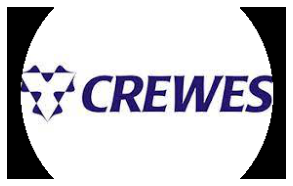

In [114]:
lx, ly, _ = crewes.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 3
crewes2=crewes.copy()
crewes2[mask,:] = 0 # masks
plt.figure(figsize=(5,5));
plt.imshow(crewes2), plt.axis('off'), plt.show();

## Other stuff?
  * `_ix()`
  * a.copy()
  * np.linalg
  * np.matrixlib
  * np.fft
  * Applications? Simple monte-carlo? Images?
  * np.set_printoptions?
  * memory layouts and strides?
  * .flatten (copy) and ravel (view if possible)
  * mgrid & ogrid

## Footnotes
[1]<span id="fn1"> If you dig deep enough in some of the numpy/scipy code you will find that the actual instructions you are executing were compiled from fortran and C. In general you can pass things quite easily between existing libraries and python, but fortran and C use different storage orders for multi-dimensional arrays so you have to be a little bit careful_.</span>